In [8]:
import pandas as pd
import spacy
from tqdm import tqdm


nlp = spacy.load("en_core_web_sm")
data = pd.read_csv("train.csv")


def get_adjs(doc):
    result = []
    for token in doc:
        if token.pos_ == "ADJ":
            result.append(token.text)
    return result


def get_ents(doc):
    result = []
    for ent in doc.ents:
        if ent.label_ in ["PERSON", "NORP", "FAC", "ORG"]:
            result.append(ent.text)
    return result


def get_number_of_sents(doc):
    result = len(list(doc.sents))
    return result

In [9]:
from collections import Counter


number_of_sents, pos_adj_counter, neg_adj_counter, ent_counter = (
    [],
    Counter(),
    Counter(),
    Counter(),
)

for review, sentiment in tqdm(data.to_records(index=False)):
    doc = nlp(review)
    adjs = get_adjs(doc)
    ents = get_ents(doc)

    # what to do with number_of_sents
    number_of_sents.append(get_number_of_sents(doc))
    
    # what to do with pos_adj_counter and neg_adj_counter
    for adj in adjs:
        if sentiment == "positive":
            pos_adj_counter.update(adjs)
        elif sentiment == "negative":
            neg_adj_counter.update(adjs)

    # what to do with ent_counter
    ent_counter.update(ents)

100%|██████████| 25000/25000 [16:48<00:00, 24.78it/s]


Text(0.5, 1.0, 'Number of Sentences w.r.t Sentiment')

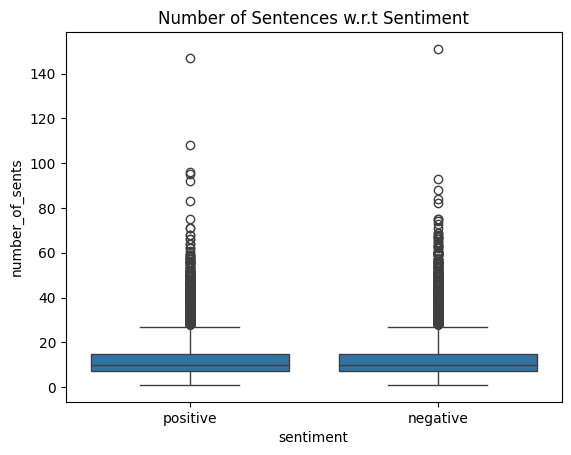

In [16]:
# Is there a significant difference in the number of sentences depending on the overall sentiment of movie reviews?
data["number_of_sents"] = number_of_sents
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="sentiment", y="number_of_sents", data=data)
plt.title("Number of Sentences w.r.t Sentiment")

Text(0, 0.5, 'Entity')

c:\Users\Prajwal\OneDrive\Videos\SAIT\aDATA475\VS_Python\lab4\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
c:\Users\Prajwal\OneDrive\Videos\SAIT\aDATA475\VS_Python\lab4\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


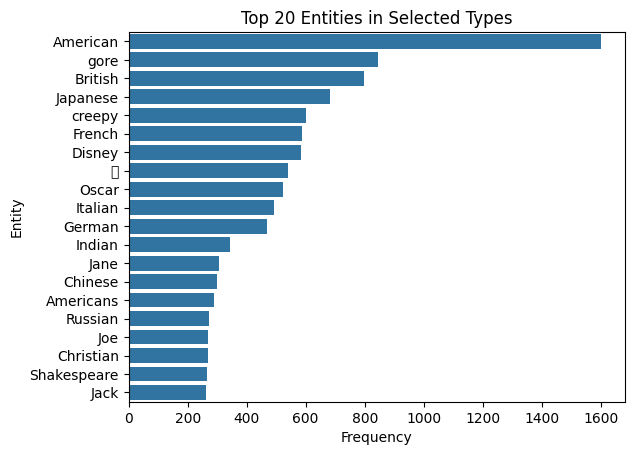

In [17]:
# What are the most frequently mentioned entities in selected types from the movie reviews?
top20_ent = ent_counter.most_common()[:20]

y = [t[0] for t in top20_ent]
x = [t[1] for t in top20_ent]

sns.barplot(x=x, y=y)

plt.title("Top 20 Entities in Selected Types")
plt.xlabel("Frequency")
plt.ylabel("Entity")

Text(0, 0.5, 'Adjective')

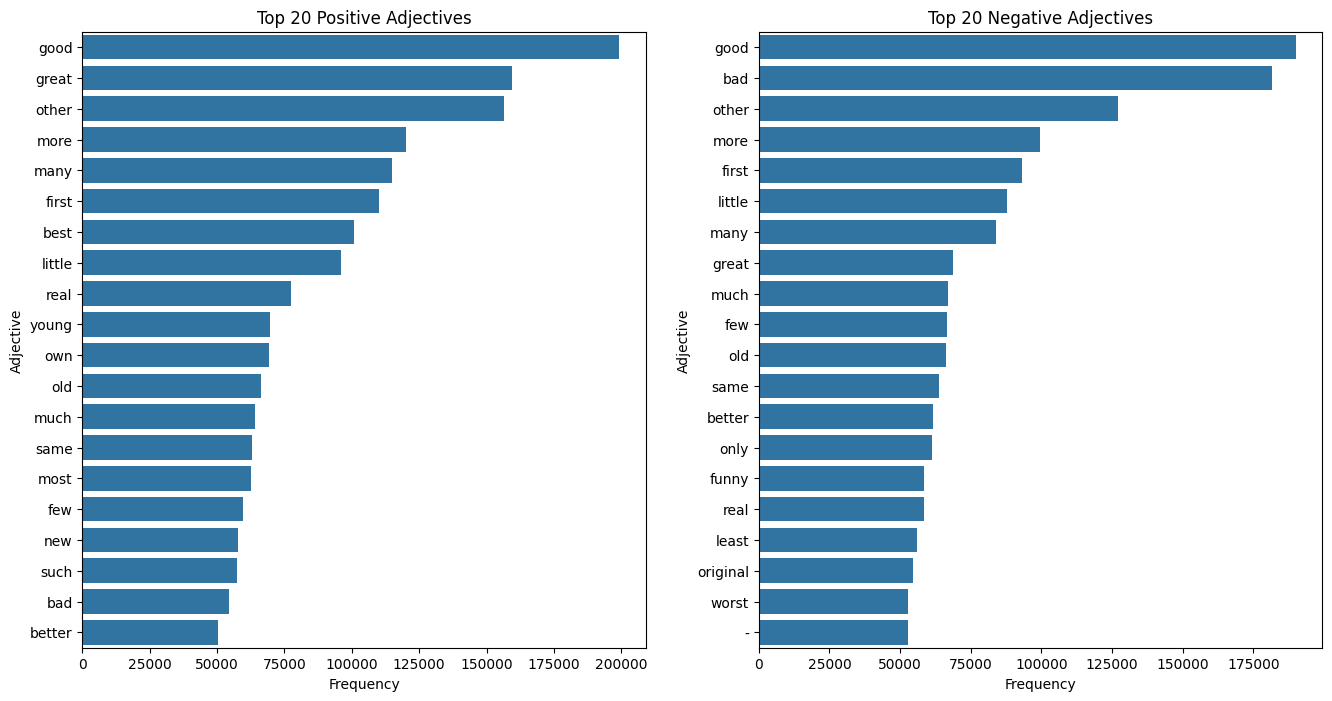

In [18]:
# What types of adjectives are more frequently used in positive movie reviews than negative ones?
import matplotlib.pyplot as plt

_, axes = plt.subplots(1, 2, figsize=(16, 8))

top20_pos_adj = pos_adj_counter.most_common()[:20]
y = [t[0] for t in top20_pos_adj]
x = [t[1] for t in top20_pos_adj]
sns.barplot(x=x, y=y, ax=axes[0])
axes[0].set_title("Top 20 Positive Adjectives")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Adjective")

top20_neg_adj = neg_adj_counter.most_common()[:20]
y = [t[0] for t in top20_neg_adj]
x = [t[1] for t in top20_neg_adj]
sns.barplot(x=x, y=y, ax=axes[1])
axes[1].set_title("Top 20 Negative Adjectives")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Adjective")